<h1>Encuesta sobre lenguajes de programación y género</h1>

<h2><u>Introducción</u></h2>

una breve introducción de la idea con link a la encuesta. También cargamos los módulos que usaremos

Hace un tiempo en el chat de Télegram de OSL de la UGR (Oficina de Software libre de la Universidad) estuvimos hablando del género en el mundo de la programación y me surgió una duda.

<center><i>¿Hay diferencias de género en el uso de los lenguajes de programación?</i> </center>

Me pareció muy interesante, así que cree un formulario en  [Google Docs](https://docs.google.com/forms/d/1eRi4r4vu5htiCSj5agKJMwcNp2uV7Vu1uTeqnKllGaw). 

La idea era ver como se distribuye el género en los lenguajes de programación. O al menos hacerme una idea ya que con este tipo de encuesta siempre se tienen muchos sesgos. Por ejemplo quién participa ya que al enviarla a personas amigas es muy probable que sean muy similares a mi y no muestren toda la diversidad que hay. También la forma en que está hecha seguro que tiene multiples fallos. Al menos limité a que te tengas que identificar para participar evitando un poco que alguien la haga varias veces.

A pesar de los posibles errores puede servir para hacerse una idea, una primera aproximación.

También he querido aprovechar para aprender [Jupyter](http://jupyter.org) y su notebook. Así el análisis de los datos de la encuesta lo podéis reproducir todos y modificar a vuestro antojo, ¡¡¡¡viva la ciencia libre!!!!. Los datos los podéis hallar en esta [hoja de cálculo de Google](https://docs.google.com/spreadsheets/d/1xFpri9AF6N23vo6J5UUA_d5rY_oeVwpQ-EUBani0O7M)

Lo que veís a continuación es la parte donde cargo las librerías que voy a usar.

In [2]:
# -*- coding: utf-8 -*- 
import requests
import io
import operator
import  csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.plotly as py
import cufflinks as cf
from scipy import stats
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
%matplotlib inline

<h2><u>Descripción de los datos obtenidos</u></h2>

La encuesta consistía en tres preguntas que se mostraban en un orden alatorio, para cada pregunta mostraremos un gráfico con los datos obtenidos. Primero cargamos los datos de la encuesta desde el google docs.

In [3]:
headers={}
headers["User-Agent"]= "Mozilla/5.0 (Windows NT 6.2; WOW64; rv:22.0) Gecko/20100101 Firefox/22.0"
headers["DNT"]= "1"
headers["Accept"] = "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8"
headers["Accept-Encoding"] = "deflate"
headers["Accept-Language"]= "es-ES,en;q=0.5"
headers["Content-Type"]= "application/x-www-form-urlencoded; charset=UTF-8"
lines = []

file_id="1xFpri9AF6N23vo6J5UUA_d5rY_oeVwpQ-EUBani0O7M"
url = "https://docs.google.com/spreadsheets/d/{0}/export?format=csv".format(file_id)

r = requests.get(url)
r.encoding ='utf-8'



data = {}
cols = []
genero_lenguaje = {}
residencia_lenguaje = {}
lenguaje = {}
sio = io.StringIO( r.text, newline=None)
reader = csv.reader(sio, dialect=csv.excel)
rownum = 0

for row in reader:
    if rownum == 0:
        for col in row:
            col=col.upper();
            col=col.strip();
            data[col] = ''
            cols.append(col)
        

    else:
        orden_columnas=[0,1,3,2]
        for i in orden_columnas:
            col=row[i];
            col=col.upper()
            col=col.strip();
            data[cols[i]] = col
            if (i==1):
                if (not col in genero_lenguaje):
                    genero_lenguaje[col]={}
            elif (i==2):
                genero=data[cols[i-1]]
                residencia=data[cols[i+1]]
                if (col in genero_lenguaje[genero]):
                    genero_lenguaje[genero][col]+=1
                else:
                    genero_lenguaje[genero][col]=1;
                if (col in residencia_lenguaje[residencia]):
                    residencia_lenguaje[residencia][col]+=1
                else:
                    residencia_lenguaje[residencia][col]=1;
                if (not col in lenguaje):
                    lenguaje[col]=1;
                else:
                    lenguaje[col]+=1;
            elif (i==3):
                if (not col in residencia_lenguaje):
                    residencia_lenguaje[col]={}
                
    rownum = rownum + 1

generos=genero_lenguaje.keys();
residencias=residencia_lenguaje.keys();
lenguajes=lenguaje.keys();
#ordenamos alfabéticamente
generos=sorted(generos)
residencias=sorted(residencias)
lenguajes=sorted(lenguajes)

<h3>Género</h3>

Las posibilidades de género eran Hombre, Mujer, Otro, Ninguno. En la encuesta las opciones se mostraban en un orden aleatorio.

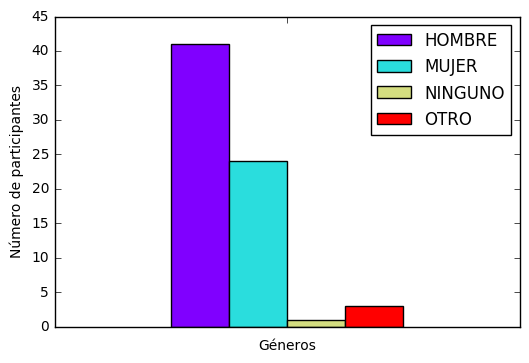

In [4]:
#gráfico de barras de cada genero
cantidad_genero={};
colors = cm.rainbow(np.linspace(0, 1, len(generos)))
for g in generos:
    datas=genero_lenguaje[g];
    total=sum(datas.values());
    cantidad_genero[g]=total;
df = pd.DataFrame(data=cantidad_genero,index=[""],columns=generos)
df.head()
genero_plot = df.plot(kind='bar',label='Gráfico de barras de cada genero',color=colors)
genero_plot.set_ylabel("Número de participantes")
genero_plot.set_xlabel("Géneros")
pass

<h3>Residencia</h3>

Esta pregunta era demasiado abierta, así que hay personas que han respondido su ciudad o su país. No he filtrado ni he agrupado lugares. Son datos en bruto.

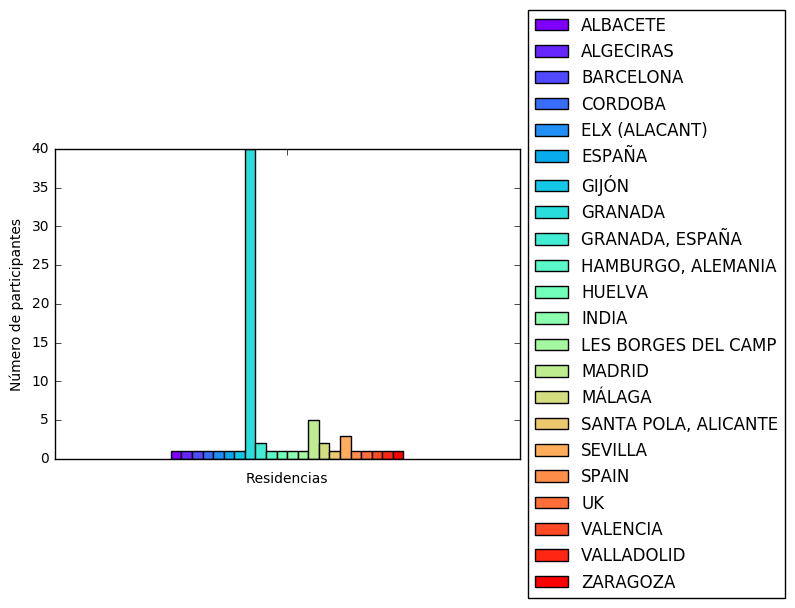

In [5]:
#gráfico de barras de cada residencia
cantidad_residencia={};
colors = cm.rainbow(np.linspace(0, 1, len(residencias)))
for g in residencias:
    datas=residencia_lenguaje[g];
    total=sum(datas.values());
    cantidad_residencia[g]=total;
df = pd.DataFrame(data=cantidad_residencia,index=[""],columns=residencias)
df.head()
residencia_plot = df.plot(kind='bar',label='Gráfico de barras de cada residencia',color=colors)
residencia_plot.set_ylabel("Número de participantes")
residencia_plot.set_xlabel("Residencias")
residencia_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

<h3>Lenguajes de programación</h3>

Aquí no he agrupado lenguajes que podrían ser el mismo como Node.js y javascript.

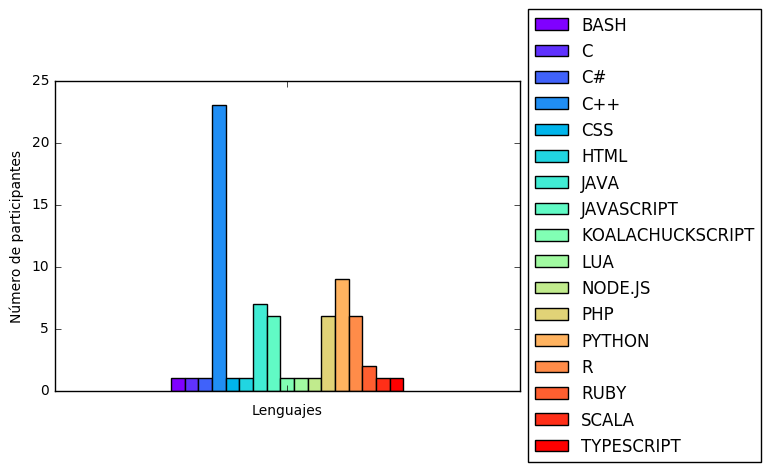

In [6]:
#gráfico de barras de lenguajes de programación
colors = cm.rainbow(np.linspace(0, 1, len(lenguajes)))
df = pd.DataFrame(data=lenguaje,index=[""],columns=lenguajes)
df.head()
lengua_plot = df.plot(kind='bar',label='Gráfico de barras de cada lenguaje',color=colors)
lengua_plot.set_ylabel("Número de participantes")
lengua_plot.set_xlabel("Lenguajes")
lengua_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

<h2><u>Género y lenguajes</u></h2>

Vamos al tema, primero podemos comparar cuantos hombres y mujeres han respondido para cada lenguaje. 
Así podemos, a simple vista, hacer una comparativa. No miro las otras opciones de género porque hay muy poca muestra.


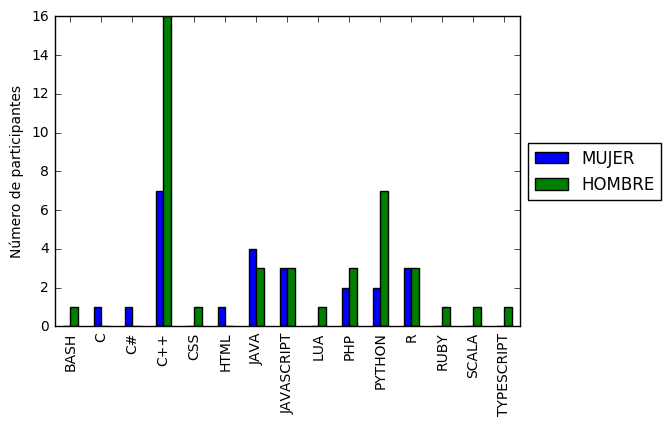

In [7]:

df = pd.DataFrame(data=genero_lenguaje,columns=['MUJER','HOMBRE'])
df.head()
plot_lenguaje_genero = df.plot(kind='bar')
plot_lenguaje_genero.set_ylabel("Número de participantes")
plot_lenguaje_genero.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

Así, a primera vista, y si los datos no cambian, solo en 6 lenguajes hay de ambos géneros. 
Podemos ver una gráfica de cada género de forma separada para los lenguajes donde hay de los dos. Para eso buscamos los lenguajes comunes y nos quedamos con los géneros que tengan más de 1 en común.

In [8]:
genero_ambos_lenguaje={}
for g1 in generos:
    lenguajes_g1=set(genero_lenguaje[g1].keys())
    comunes={}
    for g2 in generos:
        if (g1!=g2):
            lenguajes_g2=set(genero_lenguaje[g2].keys());
            encomun=sorted(list(lenguajes_g1&lenguajes_g2));
            if (len(encomun)>1):
                comunes[g2]=encomun;
    if (len(comunes)>0):
        genero_ambos_lenguaje[g1]=comunes;
personas_genero_ambos_lenguaje={}

for g1 in genero_ambos_lenguaje.keys():
    datas_g1=genero_ambos_lenguaje[g1];   
    for g2 in datas_g1.keys():
        lenguajes_g2=datas_g1[g2];
        lenguaje={}
        for l in genero_lenguaje[g1].keys():
            if (l in lenguajes_g2):
                lenguaje[l]=genero_lenguaje[g1][l]
        nombres_lenguaje_ordenado=sorted(lenguaje.keys())
        
        personas_genero_ambos_lenguaje[g1]=lenguaje
print(genero_ambos_lenguaje)
print(personas_genero_ambos_lenguaje)


{'MUJER': {'HOMBRE': ['C++', 'JAVA', 'JAVASCRIPT', 'PHP', 'PYTHON', 'R']}, 'HOMBRE': {'MUJER': ['C++', 'JAVA', 'JAVASCRIPT', 'PHP', 'PYTHON', 'R']}}
{'MUJER': {'JAVA': 4, 'R': 3, 'PYTHON': 2, 'JAVASCRIPT': 3, 'PHP': 2, 'C++': 7}, 'HOMBRE': {'JAVA': 3, 'R': 3, 'PYTHON': 7, 'JAVASCRIPT': 3, 'PHP': 3, 'C++': 16}}


Podemos ver que tenemos un diccionario donde la información del nombre de los lenguajes es la misma en ambos elementos, redundancia que le llaman. Podría quedarme con uno de ellos pero de momento los dejo. A continuación hago una gráfica para cada género.

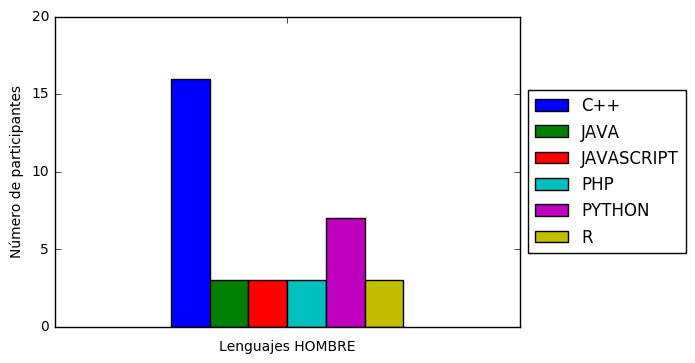

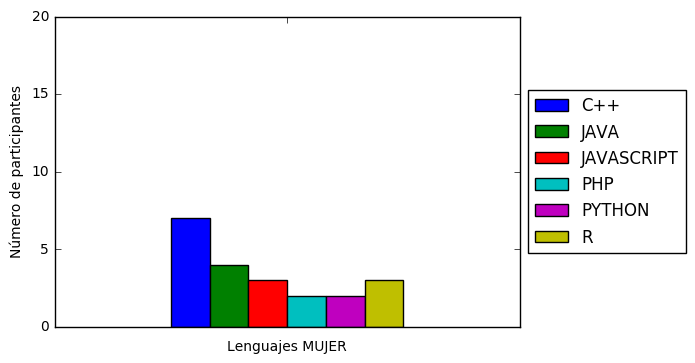

In [9]:
for g in sorted(personas_genero_ambos_lenguaje.keys()):
    lenguajes_comun=sorted(personas_genero_ambos_lenguaje[g])
    df = pd.DataFrame(data=personas_genero_ambos_lenguaje[g],index=[""],columns=lenguajes_comun)
    df.head()
    plot_lenguaje_genero_comun = df.plot(kind='bar')
    plot_lenguaje_genero_comun.set_xlabel("Lenguajes "+g)
    plot_lenguaje_genero_comun.set_ylabel("Número de participantes")
    plot_lenguaje_genero_comun.set_ylim(0,20)
    plot_lenguaje_genero_comun.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

A simple vista parece que ambas distribuciones de datos son diferentes. Cabe preguntarse si realemnte lo són. Para eso hay varios test que pueden pasarse. Cualquier sugerencia es bien recibida.

<h3>Porcentajes</h3>

Puedes ver que hay diferencias entre los datos dependiendo del género, pero claro, es que no han participado la misma cantidad de mujeres que hombres en el estudio, a lo mejor hay menos mujeres en c++ porque han participado menos, a lo mejor no es así. 

Así que para tener una mejor condición hay que ver que sucede cuando participan la misma cantidad. Para eso podemos usar los porcentajes. Un porcentaje te viene a decir cuantas personas de cada 100 que han participado han elegido algo. Vamos a calcular los porcentajes de todos y repetir las mismas gráficas que anteriormente.

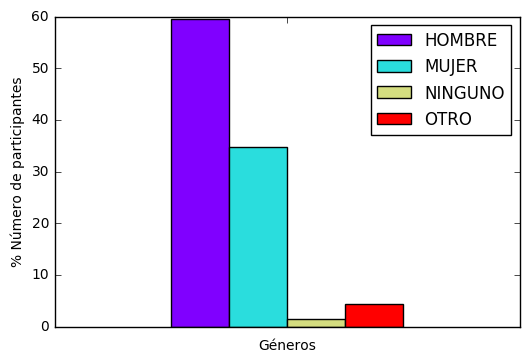

In [15]:
#gráfico de barras de cada genero

total_participantes=sum(cantidad_genero.values());
for g in generos:
    cantidad_genero[g]=cantidad_genero[g]*100/total_participantes;
df = pd.DataFrame(data=cantidad_genero,index=[""],columns=generos)
df.head()
genero_plot = df.plot(kind='bar',label='Gráfico de barras de cada genero',color=colors)
genero_plot.set_ylabel("% Número de participantes")
genero_plot.set_xlabel("Géneros")
pass

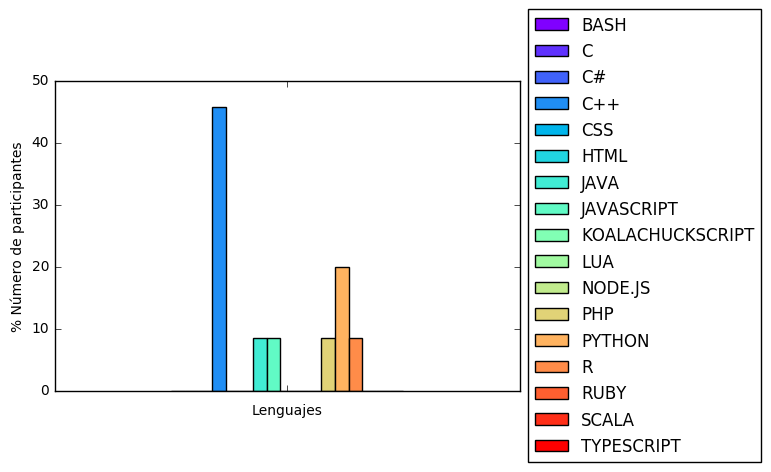

In [19]:
#gráfico de barras de lenguajes de programación
colors = cm.rainbow(np.linspace(0, 1, len(lenguajes)))
total_participantes=sum(lenguaje.values());
for g in lenguaje:
    lenguaje[g]=lenguaje[g]*100/total_participantes;
df = pd.DataFrame(data=lenguaje,index=[""],columns=lenguajes)
df.head()
lengua_plot = df.plot(kind='bar',label='Gráfico de barras de cada lenguaje',color=colors)
lengua_plot.set_ylabel("% Número de participantes")
lengua_plot.set_xlabel("Lenguajes")
lengua_plot.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

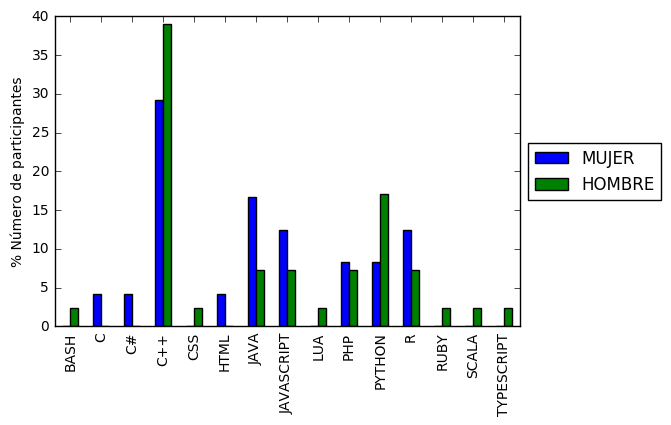

In [25]:
for g in genero_lenguaje.keys():
    total=sum(genero_lenguaje[g].values())
    for i in genero_lenguaje[g].keys():
        genero_lenguaje[g][i]=genero_lenguaje[g][i]*100/total
df = pd.DataFrame(data=genero_lenguaje,columns=['MUJER','HOMBRE'])
df.head()
plot_lenguaje_genero = df.plot(kind='bar')
plot_lenguaje_genero.set_ylabel("% Número de participantes")
plot_lenguaje_genero.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
pass

Se ve ahora que en lenguajes donde había empate ahora las mujeres son mayoritarias, he incluso en algunos se inverten la presencia.

<h2><u>Conclusión</u></h2>

Con los datos que se observan parece ser que si hay diferencias a la hora de elegir un lenguaje según tu género sea otro. Las causas se deberían mirar en otros estudios mejor hechos [1] ya que este es demasiado simple y puede presentar multitud de sesgos.

<h2><u>Bibliografía</u></h2>

En el fondo este es un tema bastante estudiado si os pasais por [google](https://www.google.co.uk/search?q=Gender+ratios+of+programmers%2C+by+language&oq=Gender+ratios+of+programmers%2C+by+language&aqs=chrome..69i57j69i60l3.183j0j9&sourceid=chrome&ie=UTF-8)

 1. [Gender ratios of programmers, by language](http://blog.revolutionanalytics.com/2016/06/programmers-gender.html)


